**What do you think about the relationship between S&P-500 index return and GDP growth?**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [22]:
stock = '^GSPC'
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020, 1, 1)
SP = yf.download(stock,start=start, end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed


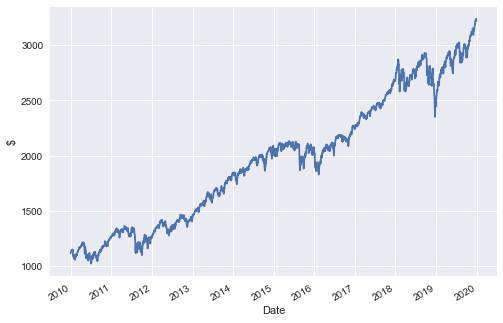

In [23]:
SP.Close.plot()
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

In [24]:
SP['year'] = SP.index.year

In [25]:
SP

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000,2009
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,2010
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,2010
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,2010
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,2010
...,...,...,...,...,...,...,...
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000,2019
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000,2019
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000,2019


In [26]:
SP_annual = SP.Close.resample('Y').mean()

In [27]:
SP_annual_return = SP_annual.pct_change().dropna()

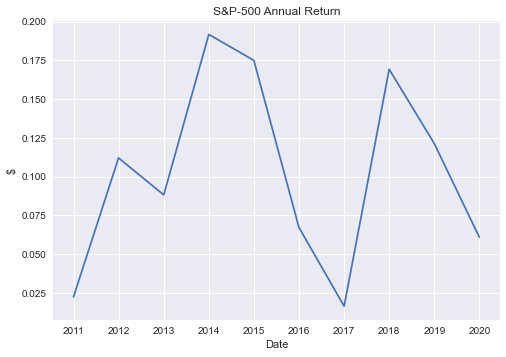

In [28]:
plt.plot(SP_annual_return)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('S&P-500 Annual Return')
plt.show()

In [13]:
import world_bank_data as wb

In [31]:
gdp_per_capita= wb.get_series('NY.GDP.PCAP.CD',country='US',
                    date='2009:2020', id_or_value='id',
                    simplify_index=True )

In [32]:
gdp_per_capita_growth = gdp_per_capita.pct_change().dropna()

In [33]:
gdp_per_capita_growth = gdp_per_capita_growth.iloc[:-1]

In [34]:
SP_annual_return.index = gdp_per_capita_growth.index

In [35]:
merge = pd.concat([SP_annual_return,gdp_per_capita],axis=1)

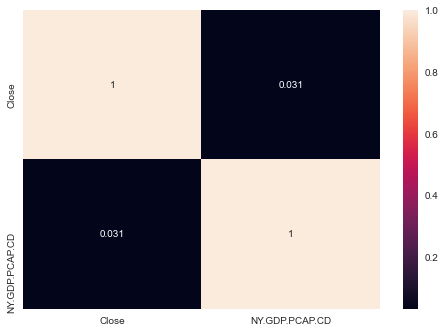

In [36]:
sns.heatmap(merge.corr(),annot=True);

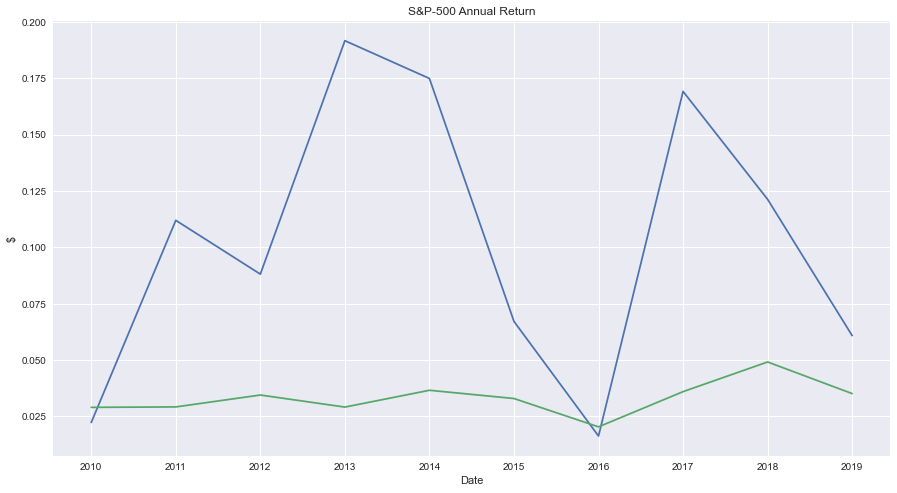

In [37]:
plt.figure(figsize=(15,8))
plt.tight_layout()
plt.plot(SP_annual_return)
plt.plot(gdp_per_capita_growth)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('S&P-500 Annual Return')
plt.show()

The line plot does not give us valuable information as there is no clear-cut trends in the plots.